In [31]:
import json
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import math
import pickle


In [32]:
# load /Users/chaokunchang/repos/ApproxInfer/data/nyc_taxi_2018-01-01_2018-12-31/cleaned_nyc_taxi_data_2018.csv
data_dir = '/Users/chaokunchang/repos/ApproxInfer/data/nyc_taxi_2018-01-01_2018-12-31'
src_data = os.path.join(data_dir, 'cleaned_nyc_taxi_data_2018.csv')
df = pd.read_csv(src_data)
# df.rename(columns={'Unnamed: 0': 'tid'}, inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

,tid,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,...,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,...,61.67,231,138,2018,3,29,3,13,3317.0,61.67
1,4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,...,62.47,87,138,2018,3,29,3,14,3648.0,62.47
2,5,2,2018-03-29 14:52:55,2018-03-29 15:51:55,1,11.60,1,N,1,42.0,...,63.13,68,138,2018,3,29,3,14,3540.0,63.13
3,10,1,2018-03-29 16:27:00,2018-03-29 17:10:05,1,5.10,1,N,1,26.5,...,33.95,186,33,2018,3,29,3,16,2585.0,33.95
4,12,2,2018-03-29 16:41:14,2018-03-29 17:56:35,1,11.11,1,N,1,45.5,...,63.67,163,138,2018,3,29,3,16,4521.0,63.67


<Axes: xlabel='pickup_datetime'>

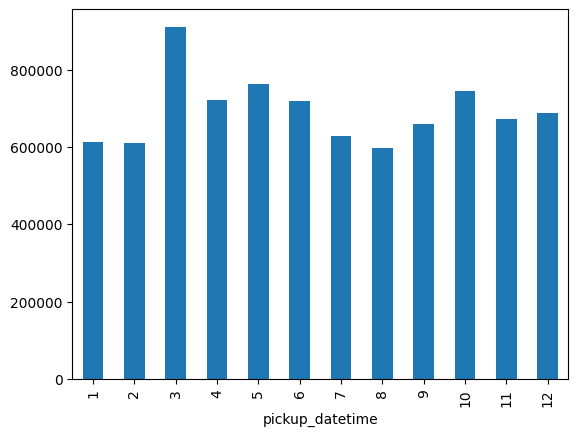

In [33]:
df['pickup_datetime'].groupby(df['pickup_datetime'].dt.month).count().plot(kind='bar')

<Axes: xlabel='pickup_datetime'>

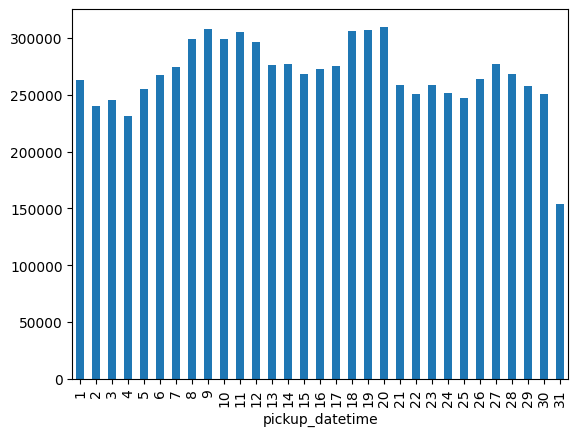

In [34]:
df['pickup_datetime'].groupby(df['pickup_datetime'].dt.day).count().plot(kind='bar')

<Axes: xlabel='pickup_datetime'>

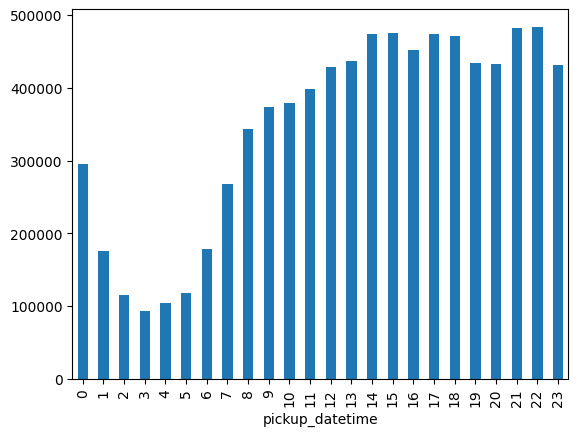

In [35]:
df['pickup_datetime'].groupby(df['pickup_datetime'].dt.hour).count().plot(kind='bar')

In [54]:
dfsubset = df.iloc[0:10, :]
dfsubset['pickup_datetime'] = pd.to_datetime(dfsubset['pickup_datetime'])
dfsubset

/var/folders/jc/9pvzmdx56739kbdw7v6nymzc0000gn/T/ipykernel_58724/3211301861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsubset['pickup_datetime'] = pd.to_datetime(dfsubset['pickup_datetime'])


,tid,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,...,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,...,61.67,231,138,2018,3,29,3,13,3317.0,61.67
1,4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,...,62.47,87,138,2018,3,29,3,14,3648.0,62.47
2,5,2,2018-03-29 14:52:55,2018-03-29 15:51:55,1,11.60,1,N,1,42.0,...,63.13,68,138,2018,3,29,3,14,3540.0,63.13
3,10,1,2018-03-29 16:27:00,2018-03-29 17:10:05,1,5.10,1,N,1,26.5,...,33.95,186,33,2018,3,29,3,16,2585.0,33.95
4,12,2,2018-03-29 16:41:14,2018-03-29 17:56:35,1,11.11,1,N,1,45.5,...,63.67,163,138,2018,3,29,3,16,4521.0,63.67
5,13,2,2018-03-29 16:03:38,2018-03-29 17:05:56,1,9.54,1,N,1,41.0,...,58.27,138,244,2018,3,29,3,16,3738.0,58.27
6,17,1,2018-03-29 17:17:43,2018-03-29 18:17:41,1,10.00,1,N,1,38.5,...,48.35,138,25,2018,3,29,3,17,3598.0,48.35
7,18,1,2018-03-29 17:27:28,2018-03-29 18:21:55,1,9.80,1,N,1,38.5,...,53.00,138,90,2018,3,29,3,17,3267.0,53.00
8,20,1,2018-03-29 17:07:32,2018-03-29 18:13:31,2,14.10,1,N,1,48.5,...,63.06,264,264,2018,3,29,3,17,3959.0,63.06
9,23,1,2018-05-19 00:58:26,2018-05-19 01:23:38,1,18.50,1,N,1,50.0,...,66.65,132,255,2018,5,19,5,0,1512.0,66.65


In [65]:
tmp = dfsubset.sort_values(by='pickup_datetime').groupby('vendor_id').rolling(window='1H', on='pickup_datetime').sum()
tmp

/var/folders/jc/9pvzmdx56739kbdw7v6nymzc0000gn/T/ipykernel_58724/3424542050.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dropoff_datetime', 'store_and_fwd_flag'], dtype='object')
  tmp = dfsubset.sort_values(by='pickup_datetime').groupby('vendor_id').rolling(window='1H', on='pickup_datetime').sum()


calculated_total_amount     pickup_datetime   day  day_of_week  \
vendor_id                                                                     
1         3                    33.95 2018-03-29 16:27:00  29.0          3.0   
          8                    97.01 2018-03-29 17:07:32  58.0          6.0   
          6                   145.36 2018-03-29 17:17:43  87.0          9.0   
          7                   164.41 2018-03-29 17:27:28  87.0          9.0   
          9                    66.65 2018-05-19 00:58:26  19.0          5.0   
2         0                    61.67 2018-03-29 13:07:48  29.0          3.0   
          1                    62.47 2018-03-29 14:19:11  29.0          3.0   
          2                   125.60 2018-03-29 14:52:55  58.0          6.0   
          5                    58.27 2018-03-29 16:03:38  29.0          3.0   
          4                   121.94 2018-03-29 16:41:14  58.0          6.0   

             dropoff_location_id  extra  fare_amount  hour_of_day  \
vendor_id                                                           
1         3                 33.0    1.0         26.5         16.0   
          8                297.0    2.0         75.0         33.0   
          6                322.0    3.0        113.5         50.0   
          7                379.0    3.0        125.5         51.0   
          9                255.0    0.5         50.0          0.0   
2         0                138.0    0.0         49.5         13.0   
          1                138.0    0.0         45.5         14.0   
          2                276.0    0.0         87.5         28.0   
          5                244.0    1.0         41.0         16.0   
          4                382.0    2.0         86.5         32.0   

             imp_surcharge  month  ...  payment_type  pickup_location_id  \
vendor_id                          ...                                     
1         3            0.3    3.0  ...           1.0               186.0   
          8            0.6    6.0  ...           2.0               450.0   
          6            0.9    9.0  ...           3.0               588.0   
          7            0.9    9.0  ...           3.0               540.0   
          9            0.3    5.0  ...           1.0               132.0   
2         0            0.3    3.0  ...           1.0               231.0   
          1            0.3    3.0  ...           1.0                87.0   
          2            0.6    6.0  ...           2.0               155.0   
          5            0.3    3.0  ...           1.0               138.0   
          4            0.6    6.0  ...           2.0               301.0   

             rate_code   tid  tip_amount  tolls_amount  total_amount  \
vendor_id                                                              
1         3        1.0  10.0        5.65          0.00         33.95   
          8        2.0  30.0       12.65          5.76         97.01   
          6        3.0  47.0       20.70          5.76        145.36   
          7        3.0  55.0       21.99         11.52        164.41   
          9        1.0  23.0       15.35          0.00         66.65   
2         0        1.0   3.0        5.61          5.76         61.67   
          1        1.0   4.0       10.41          5.76         62.47   
          2        2.0   9.0       24.98         11.52        125.60   
          5        1.0  13.0        9.71          5.76         58.27   
          4        2.0  25.0       20.32         11.52        121.94   

             trip_distance  trip_duration    year  
vendor_id                                          
1         3           5.10         2585.0  2018.0  
          8          19.20         6544.0  4036.0  
          6          29.20        10142.0  6054.0  
          7          33.90        10824.0  6054.0  
          9          18.50         1512.0  2018.0  
2         0          16.97         3317.0  2018.0  
          1          14.45         3648.0

In [55]:
def extrac_all(in_df, idx_col='pickup_datetime', groupby_col='vendor_id', window='1H', agg_cols=['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']):
    sorted_df = in_df.set_index(idx_col).sort_index()
    gby_df = sorted_df.groupby(groupby_col)
    tids = gby_df.apply(lambda x: x['tid'])
    gby_df = gby_df[agg_cols]
    gby_sum = gby_df.rolling(window).sum().add_prefix('sum_')
    gby_count = gby_df.rolling(window).count().add_prefix('count_')
    gby_mean = gby_df.rolling(window).mean().add_prefix('mean_')
    gby_median = gby_df.rolling(window).median().add_prefix('median_')
    gby_min = gby_df.rolling(window).min().add_prefix('min_')
    gby_max = gby_df.rolling(window).max().add_prefix('max_')
    gby_var = gby_df.rolling(window).var().add_prefix('var_')
    
    # combine all results into single dataframe
    df_all = pd.concat([tids, gby_sum, gby_count, gby_mean, gby_median, gby_min, gby_max, gby_var], axis=1)
    return df_all
extracted = extrac_all(dfsubset)
extracted.head()

tid  sum_trip_distance  sum_fare_amount  \
vendor_id pickup_datetime                                                
1         2018-03-29 16:27:00   10                5.1             26.5   
          2018-03-29 17:07:32   20               19.2             75.0   
          2018-03-29 17:17:43   17               29.2            113.5   
          2018-03-29 17:27:28   18               33.9            125.5   
          2018-05-19 00:58:26   23               18.5             50.0   

                               sum_tip_amount  sum_total_amount  \
vendor_id pickup_datetime                                         
1         2018-03-29 16:27:00            5.65             33.95   
          2018-03-29 17:07:32           12.65             97.01   
          2018-03-29 17:17:43           20.70            145.36   
          2018-03-29 17:27:28           21.99            164.41   
          2018-05-19 00:58:26           15.35             66.65   

                               count_trip_distance  count_fare_amount  \
vendor_id pickup_datetime                                               
1         2018-03-29 16:27:00                  1.0                1.0   
          2018-03-29 17:07:32                  2.0                2.0   
          2018-03-29 17:17:43                  3.0                3.0   
          2018-03-29 17:27:28                  3.0                3.0   
          2018-05-19 00:58:26                  1.0                1.0   

                               count_tip_amount  count_total_amount  \
vendor_id pickup_datetime                                             
1         2018-03-29 16:27:00               1.0                 1.0   
          2018-03-29 17:07:32               2.0                 2.0   
          2018-03-29 17:17:43               3.0                 3.0   
          2018-03-29 17:27:28               3.0                 3.0   
          2018-05-19 00:58:26               1.0                 1.0   

                               mean_trip_distance  ...  min_tip_amount  \
vendor_id pickup_datetime                          ...                   
1         2018-03-29 16:27:00            5.100000  ...            5.65   
          2018-03-29 17:07:32            9.600000  ...            5.65   
          2018-03-29 17:17:43            9.733333  ...            5.65   
          2018-03-29 17:27:28           11.300000  ...            6.94   
          2018-05-19 00:58:26           18.500000  ...           15.35   

                               min_total_amount  max_trip_distance  \
vendor_id pickup_datetime                                            
1         2018-03-29 16:27:00             33.95                5.1   
          2018-03-29 17:07:32             33.95               14.1   
          2018-03-29 17:17:43             33.95               14.1   
          2018-03-29 17:27:28             48.35               14.1   
          2018-05-19 00:58:26             66.65               18.5   

                               max_fare_amount  max_tip_amount  \
vendor_id pickup_datetime                                        
1         2018-03-29 16:27:00             26.5            5.65   
          2018-03-29 17:07:32             48.5            7.00   
          2018-03-29 17:17:43             48.5            8.05   
          2018-03-29 17:27:28             48.5            8.05   
          2018-05-19 00:58:26             50.0           15.35   

                               max_total_amount  var_trip_distance  \
vendor_id pickup_datetime                                            
1         2018-03-29 16:27:00             33.95                NaN   
          2018-03-29 17:07:32             63.06          40.500000   
          2018-03-29 17:17:43             63.06          20.303333   
          2018-03-29 17:27:28             63.06           5.890000   
          2018-05-19 00:58:26             66.65                NaN   

                               var_fare_amount  var_tip_amount  \
ve

In [68]:

feature_dir = os.path.join(data_dir, 'features')
if not os.path.exists(feature_dir):
    os.makedirs(feature_dir)
feature_path = os.path.join(feature_dir, 'head10_gbyvid_winbypickup_1hour.csv')

In [ ]:
extrac_all(dfsubset, groupby_col='vendor_id', window='1H').to_csv(
    os.path.join(feature_dir, 'head10_gbyvid_winbypickup_1hour.csv'))
extrac_all(dfsubset, groupby_col='vendor_id', window='1D').to_csv(
    os.path.join(feature_dir, 'head10_gbyvid_winbypickup_1day.csv'))
extrac_all(dfsubset, groupby_col='vendor_id', window='7D').to_csv(
    os.path.join(feature_dir, 'head10_gbyvid_winbypickup_1week.csv'))

extrac_all(dfsubset, groupby_col='passenger_count', window='1H').to_csv(
    os.path.join(feature_dir, 'head10_gbypc_winbypickup_1hour.csv'))
extrac_all(dfsubset, groupby_col='passenger_count', window='1D').to_csv(
    os.path.join(feature_dir, 'head10_gbypc_winbypickup_1day.csv'))
extrac_all(dfsubset, groupby_col='passenger_count', window='7D').to_csv(
    os.path.join(feature_dir, 'head10_gbypc_winbypickup_1week.csv'))